# Linear Regression using PyTorch

### Pipeline
  - Data:
      - Load dataset
      - DataLoader
      - Visualize dataset samples
  - Design Model:
      - Model Architecture
      - Forward Pass
  - Define Loss Function
  - Define Optimizer
  - Train:
      - Forward Pass (compute activations and loss)
      - Backward Pass (compute gradients)
      - Update Weights

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

/home/faris/miniconda3/envs/cudalab/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Import dataset

In [2]:
X_numpy, y_numpy = datasets.make_regression(n_samples=200, n_features=1, noise=20, random_state=1)

In [3]:
X_torch = torch.from_numpy(X_numpy.astype(np.float32))
y_torch = torch.from_numpy(y_numpy.astype(np.float32)).view(-1,1)

In [4]:
X_torch.shape

torch.Size([200, 1])

In [5]:
y_torch.shape

torch.Size([200, 1])

### Design Model

In [6]:
in_features = X_torch.shape[1]
out_features = y_torch.shape[1]

In [7]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define diferent layers
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

In [8]:
model = LinearRegression(in_features, out_features)

In [9]:
model

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

### Design Loss and Optimizer

In [9]:
criterion = nn.MSELoss()

In [10]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Training

In [11]:
num_epochs = 100

In [12]:
for epoch in range(num_epochs):
    y_pred = model(X_torch)
    loss = criterion(y_torch, y_pred)

    loss.backward()
    optimizer.step()
    
    optimizer.zero_grad()

    if(epoch%10 == 0):
        print(model.parameters())

<generator object Module.parameters at 0x7f1671f18120>
<generator object Module.parameters at 0x7f1671f18040>
<generator object Module.parameters at 0x7f1671f18040>
<generator object Module.parameters at 0x7f1671f18040>
<generator object Module.parameters at 0x7f1671f18040>
<generator object Module.parameters at 0x7f1671f18040>
<generator object Module.parameters at 0x7f1671f18040>
<generator object Module.parameters at 0x7f1671f18040>
<generator object Module.parameters at 0x7f1671f18040>
<generator object Module.parameters at 0x7f1671f18040>


In [13]:
y_pred = model(X_torch)

In [14]:
type(y_pred)

torch.Tensor

In [15]:
y_pred_numpy = y_pred.detach().numpy()

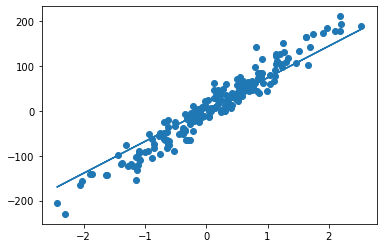

In [16]:
plt.scatter(X_numpy, y_numpy)
plt.plot(X_numpy, y_pred_numpy)